In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Sample times from
times = { 100:       0.012892723083496094
        , 200:       0.03521013259887695
        , 300:       0.04486989974975586
        , 400:       0.11879801750183105
        , 500:       0.07211589813232422
        , 600:       0.08643293380737305
        , 700:       0.16454100608825684
        , 800:       0.14229512214660645
        , 900:       0.20774078369140625
        , 1_000:     0.24251222610473633
        , 2_000:      0.4431276321411133
        , 3_000:      0.5837299823760986
        , 4_000:      0.8467867374420166
        , 5_000:      1.3550398349761963
        , 6_000:      1.3055312633514404
        , 7_000:      1.539154052734375
        , 8_000:      1.501833200454712
        , 9_000:      1.7836380004882812
        , 10_000:     2.2644760608673096
        , 20_000:     3.621049165725708
        , 30_000:     7.935749053955078
        , 40_000:    11.937450885772705
        , 50_000:    13.832309007644653
        , 60_000:    21.200021982192993
        , 70_000:    14.05952000617981
        , 80_000:    21.918147087097168
        , 90_000:    19.915006160736084
        , 100_000:   20.305248975753784
        , 200_000:   42.39032316207886
        , 300_000:  118.64940810203552
        , 400_000:  117.36248326301575
        , 500_000:  157.675843000412
        , 600_000:  228.34484767913818
        , 700_000:  235.27977013587952
        , 800_000:  261.2860050201416
        , 900_000:  299.0290479660034
        }

In [3]:
def get_curve_fit_params(model_func, xs, ys):
    popt, pcov = curve_fit(model_func, xs, ys)
    return list(popt)

# Exponential
def model_func0(x, c0, k, p):
    return c0 + k * (x ** p)

# Exponential * log
def model_func1(x, c0, k, p):
    return c0 + k * (x ** p) * np.log(x)

# Exponential * log**2
def model_func2(x, c0, k, p):
    return c0 + k * (x ** p) * np.log(x) * np.log(x)

In [4]:
xs = list(times.keys())
ts = list(times.values())
f0_c0, f0_k, f0_p = get_curve_fit_params(model_func0, xs, ts)
f1_c0, f1_k, f1_p = get_curve_fit_params(model_func1, xs, ts)
f2_c0, f2_k, f2_p = get_curve_fit_params(model_func2, xs, ts)
    
t0s = [model_func0(x, f0_c0, f0_k, f0_p) for x in xs]
t1s = [model_func1(x, f1_c0, f1_k, f1_p) for x in xs]
t2s = [model_func2(x, f2_c0, f2_k, f2_p) for x in xs]

In [5]:
loss0 = mean_squared_error(xs, t0s)
loss1 = mean_squared_error(xs, t1s)
loss2 = mean_squared_error(xs, t2s)

print(f'loss0={loss0}')
print(f'loss1={loss1}')
print(f'loss2={loss2}')

loss0=79913053567.58018
loss1=79913052364.37236
loss2=79913051261.97989


In [6]:
# Note: Based on the chart below, R2 should be positive.
r2_score0 = r2_score(xs, t0s)
r2_score1 = r2_score(xs, t1s)
r2_score2 = r2_score(xs, t2s)

print(f'r2_score0={r2_score0}')
print(f'r2_score1={r2_score1}')
print(f'r2_score2={r2_score2}')

r2_score0=-0.31695731519310244
r2_score1=-0.3169572953643849
r2_score2=-0.3169572771970923


## We'll plot model_func0 only; the others are nearly identical. 

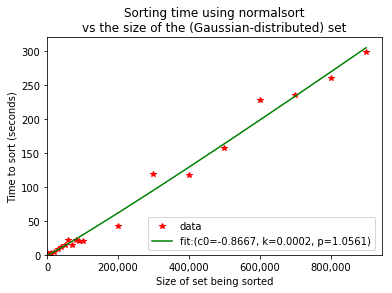

In [7]:
plt.plot(xs, ts, 'r*', label='data')
plt.plot(xs, t0s, 'g-'
        , label=f'fit:(c0={f0_c0:.4f}, k={f0_k:.4f}, p={f0_p:.4f})')
#plt.plot(xs, t1s, 'b-'
#    , label=f'fit:(c0={f1_c0:.4f}, k={f1_k:.4f}, p={f1_p:.4f})')
#plt.plot(xs, t2s, 'k-'
#    , label=f'fit:(c0={f2_c0:.4f}, k={f2_k:.4f}, p={f2_p:.4f})')

plt.xlim(100, plt.xlim()[1])
plt.ylim(0, plt.ylim()[1])
    
plt.title('Sorting time using normalsort\nvs the size of the (Gaussian-distributed) set')
plt.xlabel('Size of set being sorted')
plt.ylabel('Time to sort (seconds)')
plt.legend(loc=(0.3, 0.02))

comma_formatter = lambda x, p: format(int(x), ',')
plt.gca().get_xaxis().set_major_formatter(FuncFormatter(comma_formatter))

plt.show()